In [42]:
# import libraries
from dash import Dash, dcc, html, Input, Output, callback
import pandas as pd
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import plotly.tools as tls
from io import BytesIO
import base64

In [2]:
breaks = html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br()



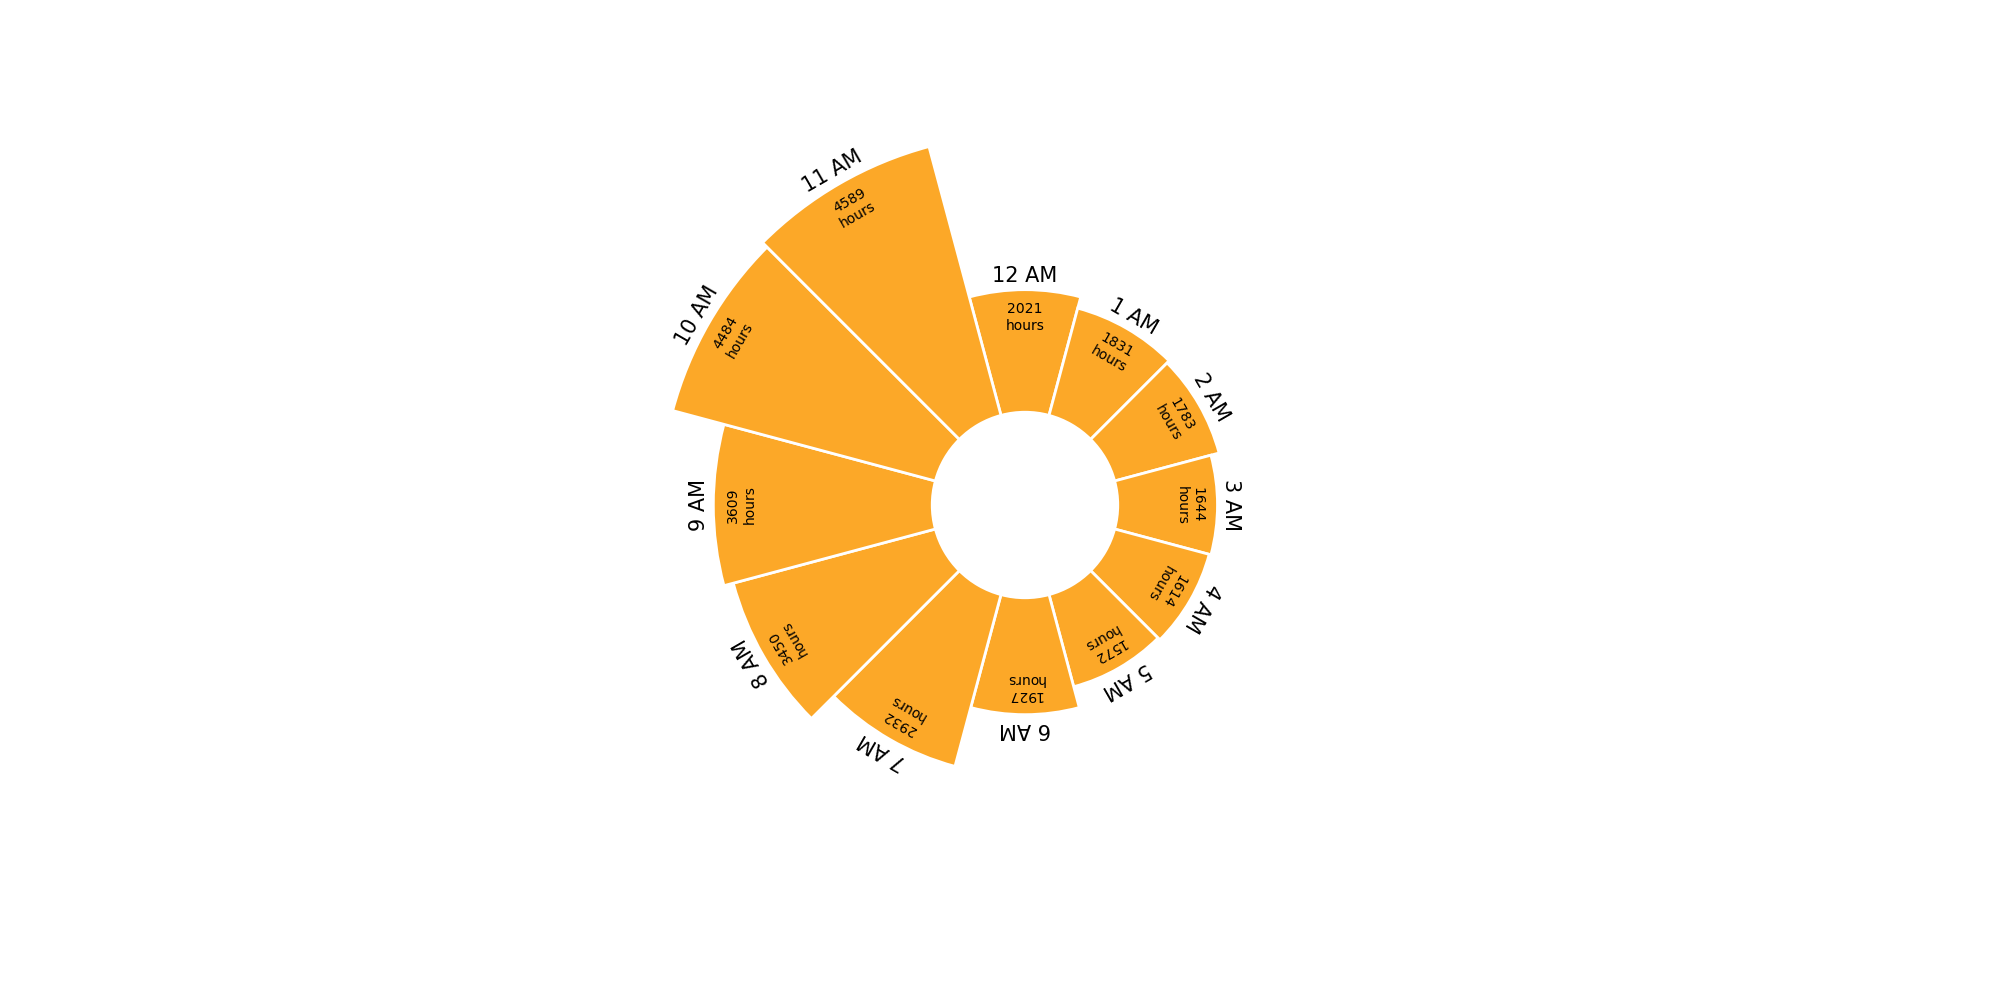

In [17]:
data = pd.read_csv('../DATA/data.csv')

## group by the hour of the day and find the number of minutes 
hours = data.groupby('hour')['minutes'].sum()
# change the index 
hours.index = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, \
               3, 4, 5, 6, 7, 8, 9, 10, 11]
hoursam = hours.iloc[:12]
hourspm = hours.iloc[12:]

allhours = [hoursam, hourspm]

#initialize the plot 
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')


# Compute max and min in the dataset
max = hoursam.max()

# Set the coordinates limits
upperLimit = max
lowerLimit = max/3

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * hoursam + lowerLimit

#Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(hoursam.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(hoursam)+1))
angles = [element * width * -1 + np.deg2rad(120) for element in indexes]


# add bars 
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#fca828",
)

# little space between the bar and the label
labelPadding = max/20


# Add labels
for bar, angle, height, label in zip(bars,angles, heights, hoursam.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)-90

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() - 2*labelPadding, 
        s=f'{round(height)}\nhours', 
        ha='center', 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 


# Add more lables labels
for bar, angle, height, label in zip(bars,angles, heights, hoursam.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)-90

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f'{label} AM', 
        ha='center', 
        va='center',
        size = 15,
        rotation=rotation, 
        rotation_mode="anchor") 
    



In [45]:
data['date'] = pd.to_datetime(data['date'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30811 entries, 0 to 30810
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  30811 non-null  int64         
 1   index       30811 non-null  int64         
 2   endTime     30811 non-null  object        
 3   artistName  30811 non-null  object        
 4   trackName   30811 non-null  object        
 5   msPlayed    30811 non-null  int64         
 6   seconds     30811 non-null  float64       
 7   minutes     30811 non-null  float64       
 8   played      30811 non-null  bool          
 9   date        30811 non-null  datetime64[ns]
 10  dayofweek   30811 non-null  object        
 11  hour        30811 non-null  int64         
 12  timeofday   30811 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 2.9+ MB


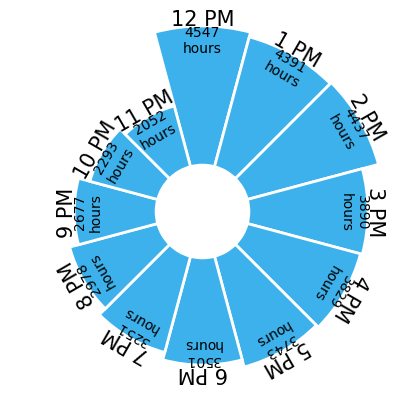

In [24]:
#initialize the plot 
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')


# Compute max and min in the dataset
max = hourspm.max()

# Set the coordinates limits
upperLimit = max
lowerLimit = max/3

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * hourspm + lowerLimit

#Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(hourspm.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(hourspm)+1))
angles = [element * width * -1 + np.deg2rad(120) for element in indexes]


# add bars 
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#3db1eb",
)

# little space between the bar and the label
labelPadding = max/20


# Add labels
for bar, angle, height, label in zip(bars,angles, heights, hourspm.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)-90

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() - 2*labelPadding, 
        s=f'{round(height)}\nhours', 
        ha='center', 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 


# Add more lables labels
for bar, angle, height, label in zip(bars,angles, heights, hourspm.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)-90

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f'{label} PM', 
        ha='center', 
        va='center',
        size = 15,
        rotation=rotation, 
        rotation_mode="anchor") 



In [50]:
stylesheet = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = Dash(__name__, external_stylesheets=stylesheet)

data = pd.read_csv('../DATA/data.csv')

############################################################################################################################################
#######################################################            HTML CHUNKS           ###################################################
############################################################################################################################################

left1 = [
    html.H1("My Listening Habits"),
    html.H2("Insert Number"),
    html.P("Total Streaming Minutes"),
    html.H2("Insert Number"),
    html.P("Different Songs"),
    html.H2("Insert Number"),
    html.P("Different Artists"),
    html.P('Between mm/dd/yy and mm/dd/yy')
]

############################################################################################################################################
#######################################################            IMAGE EXPORT           ##################################################
############################################################################################################################################

def fig_to_uri(in_fig, close_all=True, **save_args):
    # type: (plt.Figure) -> str
    """
    Save a figure as a URI
    :param in_fig:
    :return:
    """
    out_img = BytesIO()
    in_fig.savefig(out_img, format='png', **save_args)
    if close_all:
        in_fig.clf()
        plt.close('all')
    out_img.seek(0)  # rewind file
    encoded = base64.b64encode(out_img.read()).decode("ascii").replace("\n", "")
    return "data:image/png;base64,{}".format(encoded)

############################################################################################################################################
###########################################################            APP           #######################################################
############################################################################################################################################

app.layout = html.Div( # entire page
    [
        html.Div( # Top of Page 
            [
                html.H1("Title"), # title 
                html.H3("Description"), # description
            ],style={"border":"2px solid pink", 'margin':'5px'}),

        html.Div(# Bottom of Page 
            [ 
                html.Div( # left side of page 
                    [
                        html.Div(breaks, # left 3 col of left 
                                className= "four columns", 
                                style={'margin':'5px', 'backgroundColor':"#750202"}), 
                        
                        html.Div(# right 6 col of left 
                            [html.Div([
                                        "WIDGETS",
                                        dcc.DatePickerRange(
                                        id='date-slider',
                                        min_date_allowed= data['date'].min(),
                                        max_date_allowed= data['date'].max(),
                                        start_date = data['date'].min(),
                                        end_date = data['date'].max())
                                        ], style={'backgroundColor':'#eb343d', 'margin':'5px'}),
                             html.Div(['PLOT 1', html.Br(), html.Br(), html.Br()], style={'backgroundColor':'#8c1d59','margin':'5px'}),
                             html.Div("MORE WIDGETS", style={'backgroundColor':'#d10a76', 'margin':'5px'}), 
                             html.Div(# two bottom plots
                                 [
                                     html.Div(
                                         [
                                             html.Img(id = 'plot1', src = '', style={'width': '400px', 'height': '400px'}),
                                             dcc.RadioItems(options = ["AM", "PM"],
                                                            value = "AM",
                                                            inline = True,
                                                            id='AMPM-radio')
                                         ], className='six columns', style={'border':'#f08dd2', 'margin':'5px'}), 
                                     html.Div("PLOT 3", className='six columns', style={'backgroundColor':'#f08dd2', 'margin':'5px'})
                                 ])
                            
                            ], className='eight columns', style ={'margin':'5px'})
                    ], className='nine columns', style={"border":"2px solid pink"}),
                
                html.Div(breaks, 
                        style={"border":"2px solid pink"}, className='three columns')
            ])
    ], style={"border":"2px solid pink"}, className = 'row')

if __name__ == '__main__':
    app.run_server(jupyter_mode='tab', debug=True)


############################################################################################################################################
########################################################            CALLBACKS           ####################################################
############################################################################################################################################

@callback(
    Output('plot1', 'src'),
    Input('AMPM-radio', 'value')
)
def create_plot1(hours_selected):
    ## group by the hour of the day and find the number of minutes 
    hours = data.groupby('hour')['minutes'].sum()
    # change the index 
    hours.index = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, \
                3, 4, 5, 6, 7, 8, 9, 10, 11]
    hoursam = hours.iloc[:12]
    hourspm = hours.iloc[12:]

    hours_to_use = hoursam
    AMPM = "AM"
    color1 = '#fca828'

    if(hours_selected=="AM"):
        hours_to_use = hoursam
        AMPM ='AM' 
        color1 = '#fca828'
    else:
        hours_to_use = hourspm
        AMPM='PM'
        color1 = '#3db1eb'

        #initialize the plot 
    fig = plt.figure(figsize=(20,20))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')


    # Compute max and min in the dataset
    max = hours_to_use.max()

    # Set the coordinates limits
    upperLimit = max
    lowerLimit = max/3

    # Let's compute heights: they are a conversion of each item value in those new coordinates
    # In our example, 0 in the dataset will be converted to the lowerLimit (10)
    # The maximum will be converted to the upperLimit (100)
    slope = (max - lowerLimit) / max
    heights = slope * hours_to_use + lowerLimit

    #Compute the width of each bar. In total we have 2*Pi = 360°
    width = 2*np.pi / len(hours_to_use.index)

    # Compute the angle each bar is centered on:
    indexes = list(range(1, len(hours_to_use)+1))
    angles = [element * width * -1 + np.deg2rad(120) for element in indexes]


    # add bars 
    bars = ax.bar(
        x=angles, 
        height=heights, 
        width=width, 
        bottom=lowerLimit,
        linewidth=2, 
        edgecolor="white",
        color=color1,
    )

    # little space between the bar and the label
    labelPadding = max/20


    # Add labels
    for bar, angle, height, label in zip(bars,angles, heights, hours_to_use.index):

        # Labels are rotated. Rotation must be specified in degrees :(
        rotation = np.rad2deg(angle)-90

        # Finally add the labels
        ax.text(
            x=angle, 
            y=lowerLimit + bar.get_height() - 2*labelPadding, 
            s=f'{round(height)}\nhours', 
            ha='center', 
            va='center', 
            rotation=rotation, 
            size = 25,
            rotation_mode="anchor") 


    # Add more lables labels
    for bar, angle, height, label in zip(bars,angles, heights, hours_to_use.index):

        # Labels are rotated. Rotation must be specified in degrees :(
        rotation = np.rad2deg(angle)-90

        # Finally add the labels
        ax.text(
            x=angle, 
            y=lowerLimit + bar.get_height() + labelPadding, 
            s=f'{label} {AMPM}', 
            ha='center', 
            va='center',
            size = 35,
            rotation=rotation, 
            rotation_mode="anchor") 
    # plotly_fig = tls.matplotlib_to_plotly(fig)
    # return plotly_fig
    out_url = fig_to_uri(fig)
    return out_url


Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>